# Generating SBM-Isolation Dataset

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from sbm_isolation_vis import generate_sbm_graph_list, encode_selection

In [2]:
sbmg = generate_sbm_graph_list(n_samples=1)[0]
graph_data, domain_id = sbmg.get()
print(graph_data)
print(domain_id)
print(sbmg.stat())

Total generation time: 0.76 secs.                 
{'x': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4]), 'y': tensor(1), 'edge_index': tensor([[ 0,  0,  0,  ..., 78, 78, 78],
        [ 2,  3,  4,  ..., 74, 75, 76]])}
[0 1 4]
{'# of nodes': 79, '# of edges': 1119, 'avg degree': 14.164556962025317}


In [3]:
sbm_graph_list = generate_sbm_graph_list(n_samples=10000, n_processes=8)

Total generation time: 18.37 secs.                


Labels: min: 0, max: 3


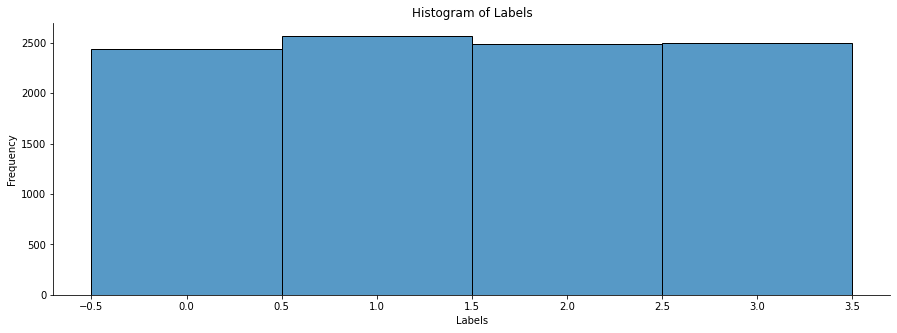

Doamin Ids: min: 0, max: 9


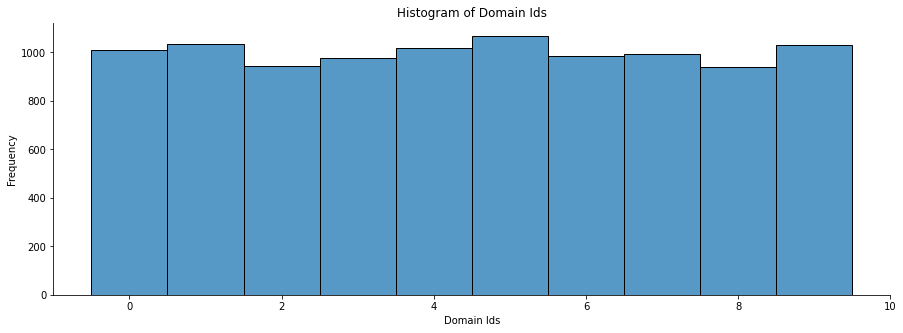

Graph sizes: min: 31, max: 87


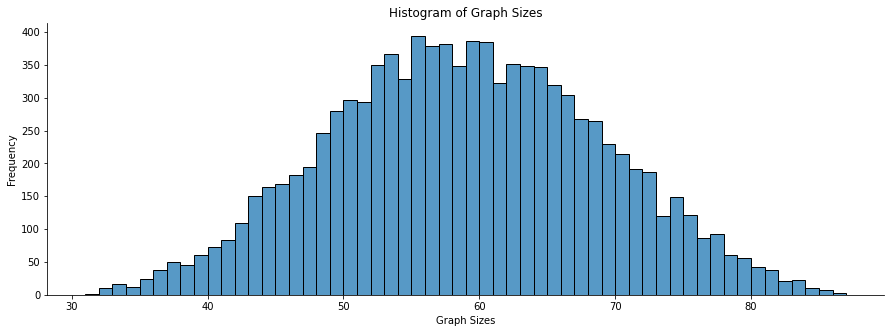

In [4]:
label_list = [int(sbmg.get()[0]['y']) for sbmg in sbm_graph_list]
domain_id_list = [int(encode_selection(sbmg.get()[1])) for sbmg in sbm_graph_list]
graph_size_list = [int(sbmg.stat()['# of nodes']) for sbmg in sbm_graph_list]


print(f'Labels: min: {min(label_list)}, max: {max(label_list)}')
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(label_list, binwidth=1, binrange=(-0.5, 3.5))
ax.set_xlabel('Labels')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Labels')
plt.show()

print(f'Doamin Ids: min: {min(domain_id_list)}, max: {max(domain_id_list)}')
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(domain_id_list, binwidth=1, binrange=(-0.5, 9.5))
ax.set_xlabel('Domain Ids')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Domain Ids')
plt.show()

print(f'Graph sizes: min: {min(graph_size_list)}, max: {max(graph_size_list)}')
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(graph_size_list, binwidth=1)
ax.set_xlabel('Graph Sizes')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Graph Sizes')
plt.show()

In [5]:
torch.save([sbmg.get()[0] for sbmg in sbm_graph_list], 'SBM-Isolation_vis.pt')
np.save('SBM-Isolation_vis_group.npy', np.stack([sbmg.get()[1] for sbmg in sbm_graph_list], axis=0))